References:
https://www.kaggle.com/simjeg/fork-of-epidemium-tutorial
http://scikit-learn.org/stable/auto_examples/neural_networks/plot_rbm_logistic_classification.html

In [35]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.ndimage import convolve
from sklearn import linear_model, datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.neural_network import BernoulliRBM
from sklearn.pipeline import Pipeline



In [36]:
# Load Data and split into training and test datasets

hist_images = np.load('X.npy')
hist_labels = np.load('Y.npy')



X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.2,random_state=0)


In [37]:
# How many images ?

print('Total number of images : {}'.format(len(hist_images)))
print('Number of images without cancer : {}'.format(np.sum(hist_labels==0)))
print('Number of images with cancer : {}'.format(np.sum(hist_labels==1)))
print('Image shape (number of rows, number of columns, channels RGB): {}'.format(hist_images[0].shape))

Total number of images : 5547
Number of images without cancer : 2759
Number of images with cancer : 2788
Image shape (number of rows, number of columns, channels RGB): (50, 50, 3)


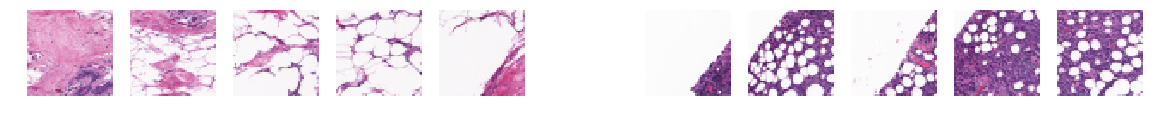

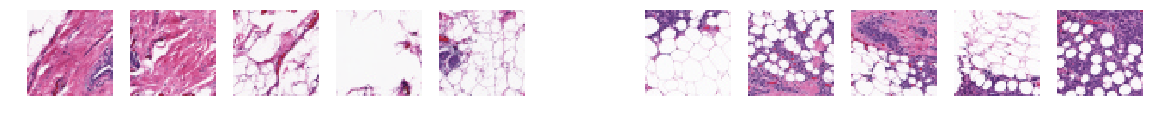

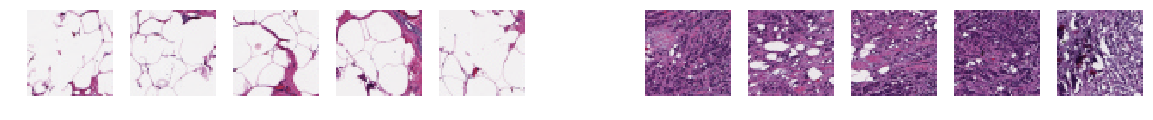

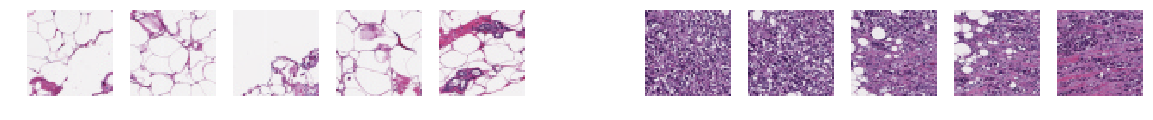

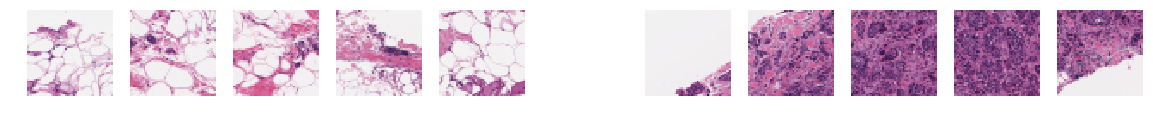

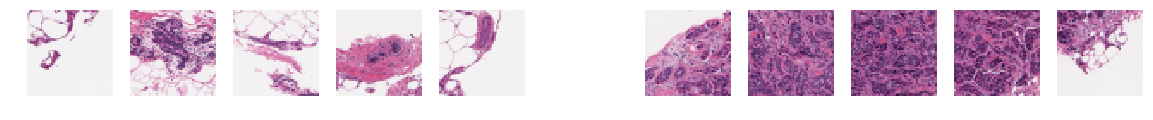

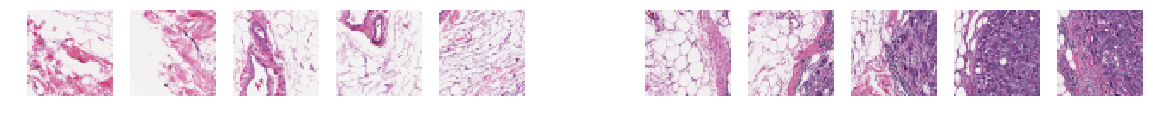

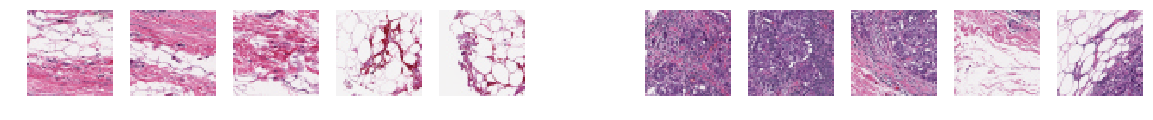

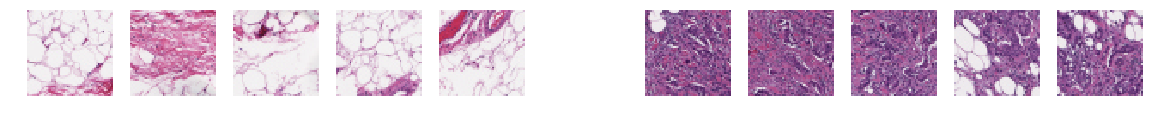

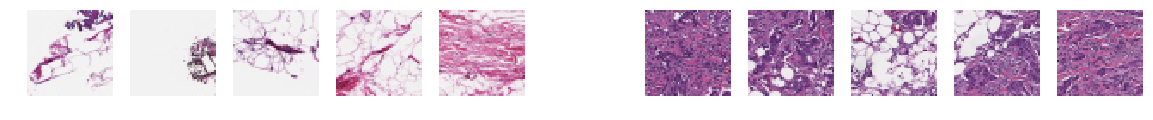

In [38]:

# Looking at some images

imgs0 = hist_images[hist_labels==0] # images with label 0 = no cancer, negative image
imgs1 = hist_images[hist_labels==1] # images with label 1 =    cancer, positive image

batch = 0 # Each batch plot 50 negative images on the left and 50 positive images on the right

for row in range(10):
    plt.figure(figsize=(20, 10))
    for col in range(5):
        plt.subplot(1,11,col+1)
        plt.imshow(imgs0[50*batch + 5*row+col])
        plt.axis('off')
        
        plt.subplot(1,11,col+7)
        plt.imshow(imgs1[50*batch + 5*row+col])
        plt.axis('off')
        
plt.show()


In [39]:

# Models we will use
logistic = linear_model.LogisticRegression()
rbm = BernoulliRBM(random_state=0, verbose=True)

classifier = Pipeline(steps=[('rbm', rbm), ('logistic', logistic)])



In [40]:
# Training

# Hyper-parameters. These were set by cross-validation, using a GridSearchCV. Here we are not performing cross-validation to
# save time.
rbm.learning_rate = 0.06
rbm.n_iter = 20

# More components tend to give better prediction performance, but larger
# fitting time
rbm.n_components = 100
logistic.C = 6000.0

# Training RBM-Logistic Pipeline
classifier.fit(X_train, Y_train)

# Training Logistic regression
logistic_classifier = linear_model.LogisticRegression(C=100.0)
logistic_classifier.fit(X_train, Y_train)


[BernoulliRBM] Iteration 1, pseudo-likelihood = -25.39, time = 0.16s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -23.77, time = 0.22s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -22.94, time = 0.24s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -21.91, time = 0.21s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -21.69, time = 0.23s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -21.06, time = 0.21s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -20.89, time = 0.21s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -20.64, time = 0.23s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -20.36, time = 0.22s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -20.09, time = 0.23s
[BernoulliRBM] Iteration 11, pseudo-likelihood = -20.08, time = 0.24s
[BernoulliRBM] Iteration 12, pseudo-likelihood = -19.82, time = 0.22s
[BernoulliRBM] Iteration 13, pseudo-likelihood = -19.64, time = 0.23s
[BernoulliRBM] Iteration 14, pseudo-likelihood = -19.61, time = 0.28s
[BernoulliRBM] Iteration 15, 

LogisticRegression(C=100.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [42]:
print("Logistic regression using RBM features:\n%s\n" % (
    metrics.classification_report( Y_test, classifier.predict(X_test))))

print("Logistic regression using raw pixel features:\n%s\n" % (
    metrics.classification_report(Y_test, logistic_classifier.predict(X_test))))



Logistic regression using RBM features:
             precision    recall  f1-score   support

          0       0.99      0.99      0.99       174
          1       0.92      0.95      0.93       184
          2       0.95      0.98      0.97       166
          3       0.97      0.91      0.94       194
          4       0.97      0.95      0.96       186
          5       0.93      0.93      0.93       181
          6       0.98      0.97      0.97       207
          7       0.95      1.00      0.97       154
          8       0.90      0.88      0.89       182
          9       0.91      0.93      0.92       169

avg / total       0.95      0.95      0.95      1797


Logistic regression using raw pixel features:
             precision    recall  f1-score   support

          0       0.85      0.94      0.89       174
          1       0.57      0.55      0.56       184
          2       0.72      0.85      0.78       166
          3       0.76      0.74      0.75       194
        

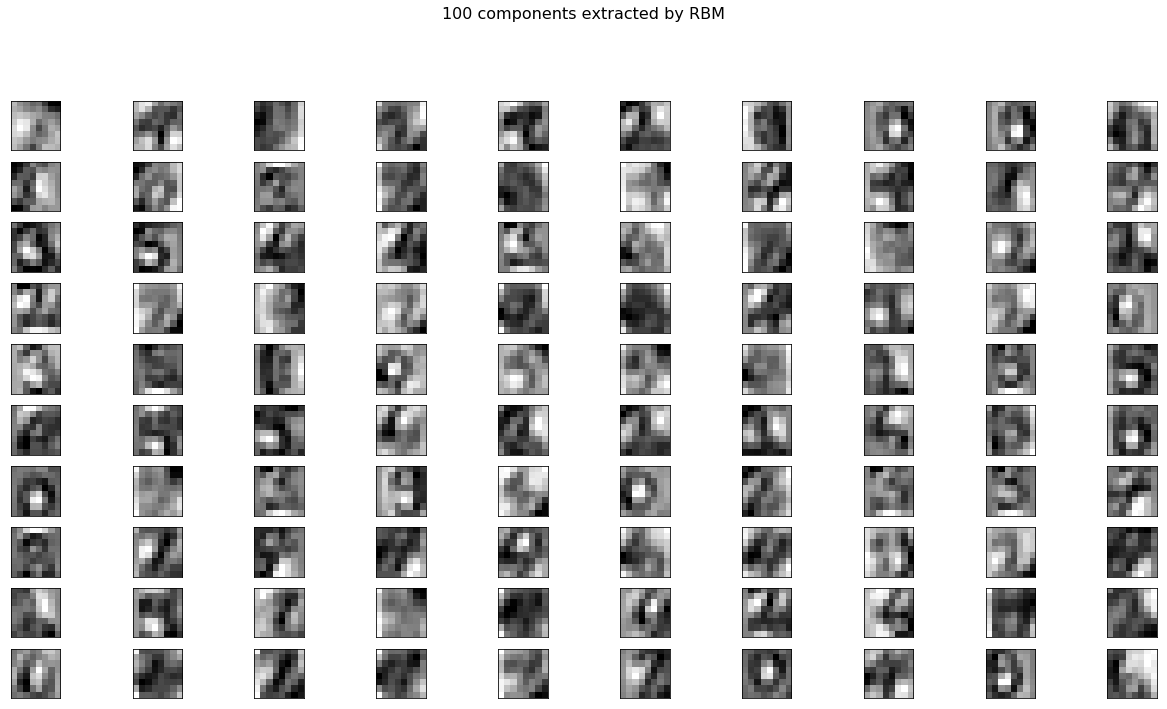

In [45]:
# Plotting

plt.figure(figsize=(20,10))
for i, comp in enumerate(rbm.components_):
    plt.subplot(10, 10, i + 1)
    plt.imshow(comp.reshape((8, 8)), cmap=plt.cm.gray_r, interpolation='nearest')
    plt.xticks(())
    plt.yticks(())
plt.suptitle('100 components extracted by RBM', fontsize=16)
plt.subplots_adjust(0.08, 0.02, 0.92, 0.85, 0.08, 0.23)

plt.show()